In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from augs import DANSE
%matplotlib inline

In [15]:
auger = DANSE()

In [17]:
print(data.shape, spec.shape, np.arange(data.shape[0]).shape, bins.shape)

(8170,) (81691,) (8170,) (81692,)


In [18]:
from scipy.signal import resample
from scipy.interpolate import interp1d

def ResampleLinear1D(original, targetLen):
    original = np.array(original, dtype=float)
    index_arr = np.linspace(0, len(original)-1, num=targetLen, dtype=float)
    index_floor = np.array(index_arr, dtype=int) #Round down
    index_ceil = index_floor + 1
    index_rem = index_arr - index_floor #Remain

    val1 = original[index_floor]
    val2 = original[index_ceil % len(original)]
    interp = val1 * (1.0-index_rem) + val2 * index_rem
    assert(len(interp) == targetLen)
    return interp

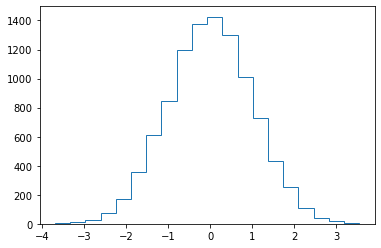

In [80]:
c = np.random.normal(size=10000)
ct, b = np.histogram(c, bins=20)
width = (b[1:] - b[:-1])[0]
plt.stairs(ct, b)

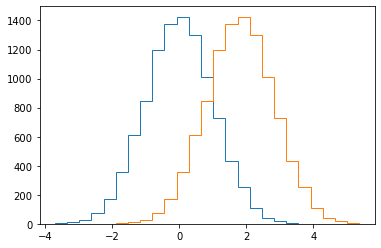

In [86]:
k = 5
tmp = np.insert(ct, 0, np.repeat(0., k))
tnb = np.arange(b[0], b[-1]+(k*width), width)
plt.stairs(ct, b)
plt.stairs(tmp, tnb)


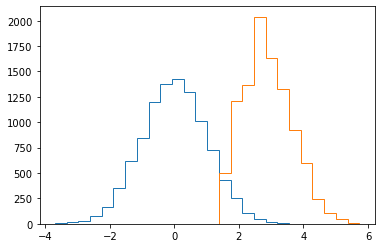

In [102]:
j = 5
diff = np.absolute(tmp - np.random.poisson(lam=j*tmp))
new = tmp - diff
new[1:] = new[1:] + diff[:-1]
new = np.append(new, diff[-1])
new[new < 0] = 0.
new = new.astype(float)
new *= np.sum(ct)/np.sum(new)
nb = np.append(tnb, tnb[-1]+width)
plt.stairs(ct, b)
plt.stairs(new, nb)

In [126]:
from scipy.stats import halfnorm
np.unique(np.round(halfnorm.rvs(scale=1, size=ct[-1])), return_counts=True)

(array([0., 1.]), array([1, 2]))

In [190]:
new_ct = ct.copy()
for i, c in enumerate(ct):
    idx, nc = np.unique(np.round(halfnorm.rvs(scale=10, size=ct[i])), return_counts=True)
    missing_idx = np.count_nonzero(i+idx >= ct.shape)
    if missing_idx > 0:
        # print(i, missing_idx, idx)
        new_ct = np.append(new_ct, np.repeat(0, np.max(idx)-1))
    new_ct[(i+idx).astype(int)] += nc
    new_ct[i] -= np.sum(nc)
new_b = np.arange(b[0], b[0]+((len(new_ct)+1)*width), width)
print(new_ct.shape, new_b.shape)
print(np.sum(ct), np.sum(new_ct))

(555,) (556,)
10000 10000


In [191]:
new_ct

array([  0,   0,   1,   7,  13,  37,  72, 130, 203, 282, 397, 522, 633,
       594, 658, 673, 648, 589, 583, 510, 451, 427, 331, 390, 298, 284,
       192, 199, 172, 142, 118,  88,  81,  67,  43,  35,  24,  28,  16,
        13,  11,   7,   9,   6,   8,   2,   3,   1,   0,   1,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

(-3.0, 25.0)

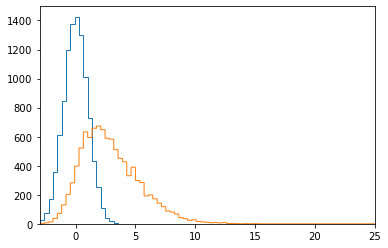

In [192]:
plt.stairs(ct, b)
plt.stairs(new_ct, new_b)
plt.xlim(-3, 25)

In [183]:
old_coeff = auger._fit((0, len(ct)), ct)
old_fwhm = 2*np.sqrt(2*np.log(2))*old_coeff[2]
new_coeff = auger._fit((0, len(new_ct)), new_ct)
new_fwhm = 2*np.sqrt(2*np.log(2))*new_coeff[2]
print(old_fwhm, new_fwhm)

6.598124594467254 14.183315097642977


6.598124594467254 14.183315097642977


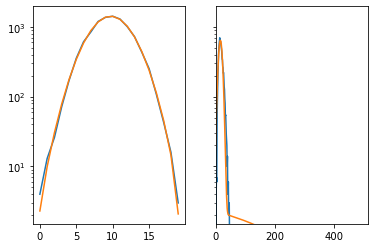

In [187]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
old_coeff = auger._fit((0, len(ct)), ct)
old_fwhm = 2*np.sqrt(2*np.log(2))*old_coeff[2]
ax1.semilogy(ct)
ax1.plot(auger._lingauss(np.arange(0, len(ct)), *old_coeff))
new_coeff = auger._fit((0, len(new_ct)), new_ct)
new_fwhm = 2*np.sqrt(2*np.log(2))*new_coeff[2]
ax2.semilogy(new_ct)
ax2.plot(auger._lingauss(np.arange(0, len(new_ct)), *new_coeff))
# ax1.set_xlim(3300, 3450)
ax2.set_xlim(0, len(new_ct))
print(old_fwhm, new_fwhm)